# Cryptocurrency Clusters

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Read in the data
df=pd.read_csv('crypto_data.csv')
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# Filter the DF to only the currency that is currently being traded. 
IsTrading_df=df[df['IsTrading']==True]
IsTrading_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
# Now that IsTrading is all true, that column is no longer necessary. Drop it and Unnamed: 0. 
IsTrading_df=IsTrading_df.drop('IsTrading', 1).drop('Unnamed: 0', 1)
IsTrading_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
1243,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,SHA-256,DPoI,NaN,1000000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
# Check how many NAN values there are. 
IsTrading_df.isnull().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [6]:
# Drop the NAN values. 
IsTrading_df=IsTrading_df.dropna()
IsTrading_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Filter the DF to only the currency being mined. 
IsTrading_df = IsTrading_df[IsTrading_df['TotalCoinsMined'] > 0]
IsTrading_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Save the CoinName column before dropping it. 
CoinName=pd.DataFrame(IsTrading_df['CoinName']).reset_index(drop=True)
CoinName

,CoinName
0,42 Coin
1,404Coin
2,EliteCoin
3,Bitcoin
4,Ethereum
...,...
527,ZEPHYR
528,Gapcoin
529,Beldex
530,Horizen


In [9]:
# Drop CoinName column. 
IsTrading_df=IsTrading_df.drop('CoinName', 1)
IsTrading_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [10]:
# Rather than using dummy variables I am using Label Encoding to convert to numeric. 
ColumnsToBeEncoded=['Algorithm', 'ProofType']
for column in ColumnsToBeEncoded:
    le=LabelEncoder()
    IsTrading_df[column] = le.fit_transform(IsTrading_df[column].values)
IsTrading_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,52,15,4.199995e+01,42
2,52,15,1.055185e+09,532000000
5,66,15,2.927942e+10,314159265359
7,47,12,1.792718e+07,21000000
8,20,12,1.076842e+08,0
...,...,...,...,...
1238,47,1,2.000000e+09,2000000000
1242,52,15,1.493105e+07,250000000
1245,10,12,9.802226e+08,1400222610
1246,18,12,7.296538e+06,21000000


In [11]:
# Standardize the data using StandardScaler. 
scaler = StandardScaler()
scaled_IsTrading = scaler.fit_transform(IsTrading_df)
print(scaled_IsTrading[0:5])

[[ 3.76459118e-01  8.91356555e-01 -1.17108170e-01 -1.52870298e-01]
 [ 3.76459118e-01  8.91356555e-01 -9.39695522e-02 -1.45008997e-01]
 [ 1.21543803e+00  8.91356555e-01  5.24945609e-01  4.48942416e+00]
 [ 7.68237937e-02  1.67233875e-03 -1.16715055e-01 -1.52559984e-01]
 [-1.54120696e+00  1.67233875e-03 -1.14746818e-01 -1.52870298e-01]]


# Dimensionality Reduction

In [12]:
# Applying PCA to reduce dimensions to 90% of the explained variance. 

# Initialize PCA model
pca =PCA(n_components=0.90)

# Get principal components of the data. 
crypto_pca = pca.fit_transform(scaled_IsTrading)

In [13]:
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2", "principal componenet 3"]
)
df_crypto_pca.head()

,principal component 1,principal component 2,principal componenet 3
0,-0.417875,0.810296,0.372138
1,-0.396564,0.815135,0.373256
2,3.124076,2.209780,0.504335
3,-0.192083,0.016266,-0.072910
4,-0.044116,-1.167492,1.012525


In [14]:
# Fetch the explained variance.
pca.explained_variance_ratio_

array([0.4350467 , 0.28670411, 0.20538956])

In [15]:
# Perform t-SNE on the PCS data
tsne = TSNE(learning_rate = 100)
transformed_crypto = tsne.fit_transform(crypto_pca)
transformed_crypto[0]

array([ 10.361231, -21.874691], dtype=float32)

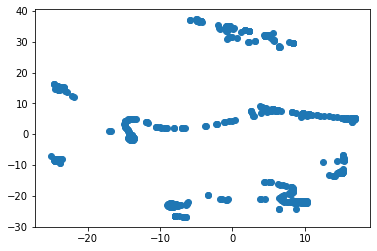

In [16]:
# Create scatter plot from t-SNE data
x = transformed_crypto[:,0]
y = transformed_crypto[:,1]
plt.scatter(x, y)
plt.show()

# Cluster Analysis with K-Means

In [17]:
# Identify best number of clusters using elbow curve
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(transformed_crypto)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\Sharon\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,280200.093750
1,2,143998.890625
2,3,77812.031250
3,4,37241.714844
4,5,24419.246094


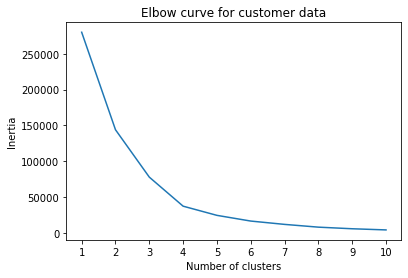

In [18]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

## Conclusion:
### Based on this model the cryptocurrency can be clustered into 4 clusters. 

# Which Cryptocurrencies can be clustered together?

### I think it is important to answer this question because the above information makes little sense to a human, especially one with very little or no machine learning and data analysis background. 

In [19]:
transform_crypto_df=pd.DataFrame(transformed_crypto).reset_index(drop=True)
transform_crypto_df

,0,1
0,10.361231,-21.874691
1,8.328435,-17.393932
2,-2.329201,3.188306
3,-24.476746,-8.669379
4,10.555265,6.618484
...,...,...
527,2.230863,29.823126
528,7.023431,-20.245609
529,5.312117,7.654860
530,9.709435,6.835279


In [20]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(transformed_crypto)

# Predict clusters
predictions = model.predict(transformed_crypto)

# Add class column to the DF
transform_crypto_df['class']=model.labels_

predictions

array([0, 0, 1, 3, 1, 3, 0, 1, 1, 1, 2, 1, 0, 2, 3, 0, 3, 3, 0, 0, 1, 1,
       3, 3, 3, 0, 3, 1, 3, 0, 3, 0, 3, 3, 2, 1, 1, 3, 3, 3, 3, 3, 2, 3,
       3, 1, 3, 3, 3, 0, 2, 1, 0, 3, 3, 3, 3, 0, 3, 1, 2, 3, 0, 2, 0, 3,
       3, 3, 0, 1, 0, 0, 0, 3, 3, 3, 2, 0, 3, 2, 3, 2, 0, 3, 3, 3, 3, 0,
       0, 3, 3, 1, 3, 0, 2, 3, 0, 0, 1, 1, 2, 2, 3, 0, 1, 3, 2, 3, 0, 3,
       2, 3, 0, 0, 3, 3, 2, 1, 3, 3, 0, 3, 1, 3, 3, 3, 0, 0, 3, 1, 3, 0,
       3, 2, 3, 3, 2, 1, 0, 1, 0, 0, 3, 3, 1, 3, 1, 0, 0, 3, 0, 3, 1, 0,
       2, 3, 1, 3, 3, 0, 2, 0, 2, 2, 3, 3, 0, 0, 0, 1, 0, 3, 2, 0, 0, 0,
       2, 3, 2, 1, 0, 0, 1, 0, 3, 0, 0, 1, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0,
       1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 3, 3, 0, 0, 2, 0, 0, 3, 2, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 3, 1, 1, 0, 0, 0, 0, 3, 0, 1, 2,
       0, 3, 2, 3, 1, 0, 3, 1, 2, 1, 0, 1, 0, 3, 2, 0, 1, 2, 0, 0, 0, 0,
       2, 0, 3, 2, 3, 2, 0, 0, 2, 3, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 3,
       0, 3, 3, 3, 0, 1, 0, 3, 1, 1, 2, 3, 0, 3, 0,

In [21]:
transform_crypto_df

,0,1,class
0,10.361231,-21.874691,0
1,8.328435,-17.393932,0
2,-2.329201,3.188306,1
3,-24.476746,-8.669379,3
4,10.555265,6.618484,1
...,...,...,...
527,2.230863,29.823126,2
528,7.023431,-20.245609,0
529,5.312117,7.654860,1
530,9.709435,6.835279,1


In [23]:
# Create a new DF which concats the Transformed_Crypto (t-SNE) with the CoinNames and a final column called Class which will indicate which cluster each cryptocurrency is a part of. 
clustered_df=pd.concat([CoinName, transform_crypto_df],axis=1, sort=False)
# clustered_df=CoinName_df.join(transform_crypto_df, how='outer')
print(clustered_df.shape)
clustered_df

(532, 4)


,CoinName,0,1,class
0,42 Coin,10.361231,-21.874691,0
1,404Coin,8.328435,-17.393932,0
2,EliteCoin,-2.329201,3.188306,1
3,Bitcoin,-24.476746,-8.669379,3
4,Ethereum,10.555265,6.618484,1
...,...,...,...,...
527,ZEPHYR,2.230863,29.823126,2
528,Gapcoin,7.023431,-20.245609,0
529,Beldex,5.312117,7.654860,1
530,Horizen,9.709435,6.835279,1


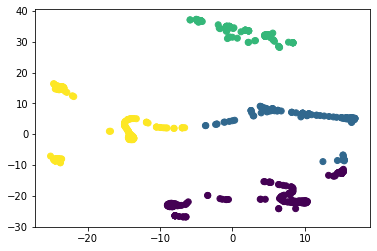

In [31]:
plt.scatter(clustered_df[0], clustered_df[1], c=clustered_df['class'])
plt.show()

In [32]:
cluster1=clustered_df[clustered_df['class']==0]
cluster1

,CoinName,0,1,class
0,42 Coin,10.361231,-21.874691,0
1,404Coin,8.328435,-17.393932,0
6,Dash,-8.614730,-22.453581,0
12,BitcoinDark,15.109654,-12.728706,0
15,KoboCoin,-6.824403,-26.818607,0
...,...,...,...,...
510,Creditbit,-0.907203,-21.203974,0
511,OKCash,14.671977,-12.423927,0
514,WhiteCoin,7.937678,-19.050478,0
517,Triangles Coin,-7.929660,-26.447941,0


In [33]:
cluster2=clustered_df[clustered_df['class']==1]
cluster2

,CoinName,0,1,class
2,EliteCoin,-2.329201,3.188306,1
4,Ethereum,10.555265,6.618484,1
7,Monero,6.282633,7.760174,1
8,Ethereum Classic,10.521123,6.394699,1
9,ZCash,9.709407,6.835224,1
...,...,...,...,...
518,Vollar,10.057073,6.391122,1
520,Reality Clash,10.555801,6.631951,1
525,BitTorrent,-1.166216,3.923769,1
529,Beldex,5.312117,7.654860,1


In [34]:
cluster3=clustered_df[clustered_df['class']==2]
cluster3

,CoinName,0,1,class
10,Bitshares,0.102455,34.299271,2
13,PayCoin,1.789945,33.787853,2
34,CasinoCoin,-0.502105,31.474075,2
42,Exclusive Coin,4.750644,32.360703,2
50,HyperStake,-4.577243,36.599239,2
...,...,...,...,...
523,Waves,7.746244,29.864717,2
524,Particl,5.036084,32.221344,2
526,Nxt,5.571634,32.828465,2
527,ZEPHYR,2.230863,29.823126,2


In [35]:
cluster4=clustered_df[clustered_df['class']==3]
cluster4

,CoinName,0,1,class
3,Bitcoin,-24.476746,-8.669379,3
5,Litecoin,-14.901112,2.874105,3
14,ProsperCoin,-14.321717,-0.927115,3
16,Spreadcoin,-23.276398,15.014340,3
17,Argentum,-14.346610,0.755527,3
...,...,...,...,...
496,Crypto Escudo,-11.886351,3.891023,3
500,Crown Coin,-24.450378,-8.678952,3
502,SmileyCoin,-6.917795,2.077760,3
508,Bata,-13.617548,-1.400773,3


## My Suggestion to the Client:

### The cryptocurrency portfolio offerings should be clustered according to the above DataFrames: Cluster1, Cluster2, Cluster3, or Cluster4. 